In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


In [10]:
df = pd.read_csv('real_state_data.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'real_state_data.csv'

In [3]:
df = df.drop(['ID'], axis=1)

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is:

-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Y: client's behavior; Y=0 then not default, Y=1 then default"

In [4]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
df.isna().sum()
# if missing values, use df.dropna() to drop them

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dpnm         0
dtype: int64

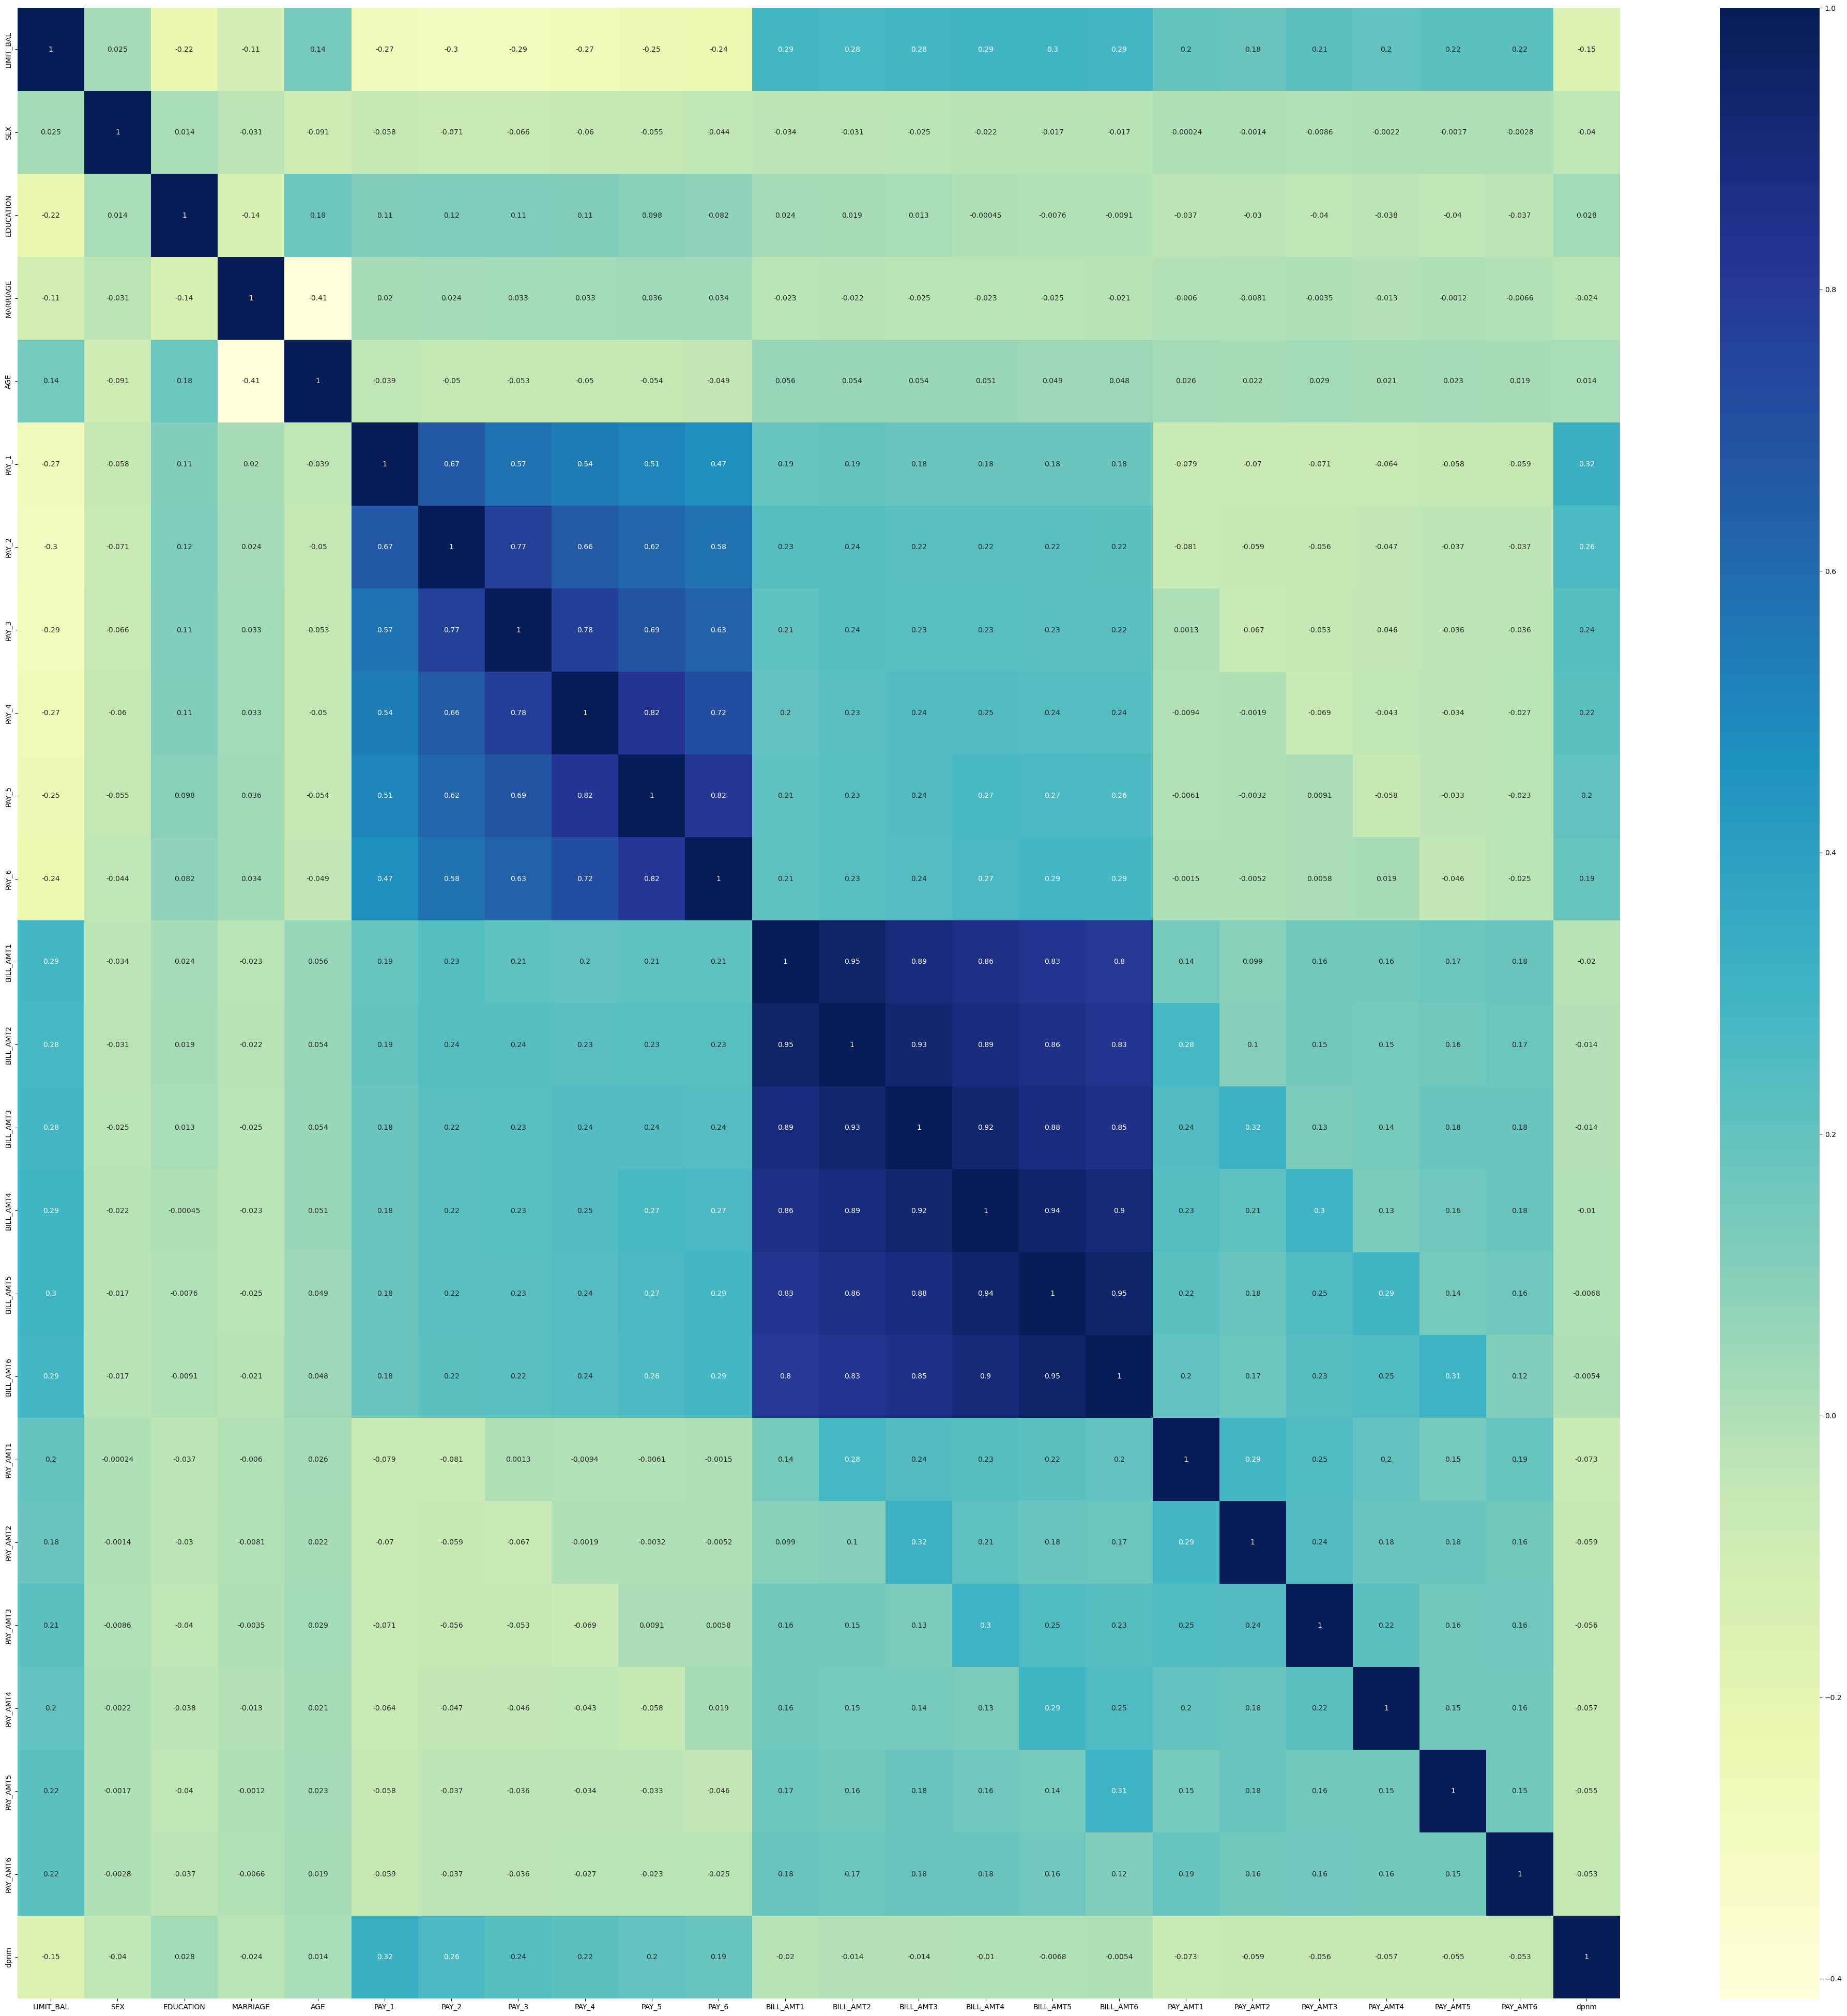

In [6]:
# create a heatmap to see the correlation between the features with size 40x40
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()


In [7]:
X = df.drop(columns=["dpnm"]) # default payment next month
Y = df["dpnm"]

In [9]:
score = -1
random_state = 0
while score < 0.1:
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=random_state)
    random_state += 1
    model = DecisionTreeRegressor(criterion="mse")
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)

# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/pyth

KeyboardInterrupt: 

<h3>Create Regression Tree</h3>

The important parameters of DecisionTreeRegressor are
<ul>
    <li>criterion: {"mse", "friedman_mse", "mae", "poisson"} - The function used to measure error</li>
    <li>max_depth - The max depth the tree can be</li>
    <li>min_samples_split - The minimum number of samples required to split a node</li>
    <li>min_samples_leaf - The minimum number of samples that a leaf can contain</li>
    <li>max_features: {"auto", "sqrt", "log2"} - The number of feature we examine looking for the best one, used to speed up training</li>
</ul>

In [ ]:
reg_tree = DecisionTreeRegressor(criterion="mse")
reg_tree.fit(X_train, Y_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse')

In [ ]:
reg_tree.score(X_test, Y_test)

-0.6135765321949143